In [1]:
using DifferentialEquations
# Define a problem
p = (1.0,2.0,1.5,1.25) # a,b,c,d
f = function (du,u,p,t) # Define f as an in-place update into du
    a,b,c,d = p
    du[1] = a*u[1] - b*u[1]*u[2]
    du[2] = -c*u[2]+ d*u[1]*u[2]
end

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1273


#3 (generic function with 1 method)

In [2]:
u0 = [1.0;1.0]; tspan = (0.0,10.0)
prob = ODEProblem(f,u0,tspan,p);
# Solve the problem
sol = solve(prob);

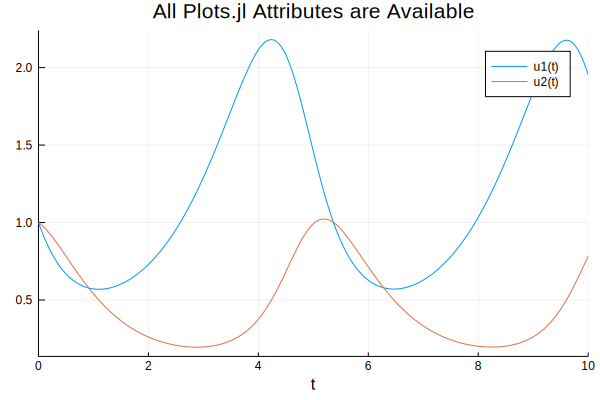

In [3]:
# Plot the solution using the plot recipe
using Plots; gr() # Using the Plotly Backend
plot(sol,title="All Plots.jl Attributes are Available")

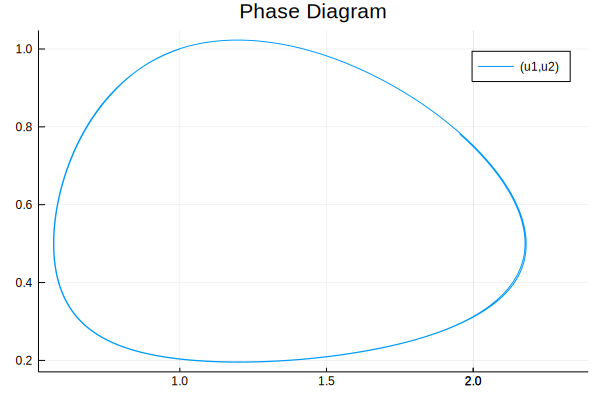

In [4]:
plot(sol,title="Phase Diagram",vars=(1,2))

In [1]:
using ParameterizedFunctions, OrdinaryDiffEq, DiffEqParamEstim, LinearAlgebra
using BlackBoxOptim, NLopt, Plots, RecursiveArrayTools #, QuadDIRECT

f = @ode_def LotkaVolterraTest begin
  dx = a*x - b*x*y
  dy = -c*y + d*x*y
end a b c d

u0 = [1.0;1.0]
tspan = (0.0,10.0)
p = [1.5,1.0,3.0,1,0]
prob = ODEProblem(f, u0, tspan, p)

notime_tgrad = ModelingToolkit.Constant[ModelingToolkit.Constant(0), ModelingToolkit.Constant(0)]
tgrad = ModelingToolkit.Constant[ModelingToolkit.Constant(0), ModelingToolkit.Constant(0)]


ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [1.0, 1.0]

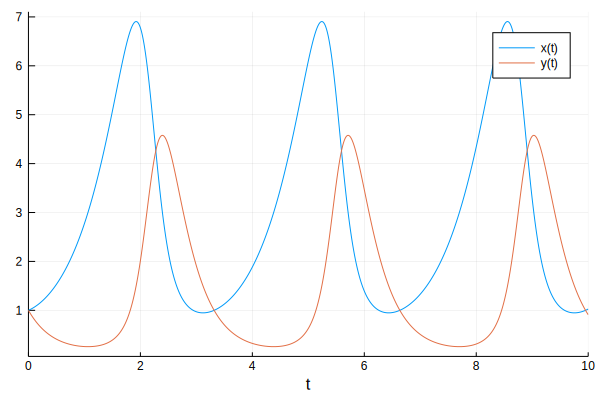

In [3]:
dt = 10.0/3000
tf = 10.0
tinterval = 0:dt:tf
t  = collect(tinterval)

data_sol = solve(prob,Tsit5(),saveat=t,reltol=1e-9,abstol=1e-9)
data = convert(Array, data_sol)
p2 = plot(data_sol)

In [7]:
loc_bounds = Tuple{Float64, Float64}[(0, 5), (0, 5), (0, 5), (0, 5)]
glo_bounds = Tuple{Float64, Float64}[(0, 10), (0, 10), (0, 10), (0, 10)]
loc_init = [1,0.5,3.5,1.5]
glo_init = [5,5,5,5]

obj = build_loss_objective(prob,Tsit5(),L2Loss(t,data),tstops=t)
res1 = bboptimize(obj;SearchRange = glo_bounds, MaxSteps = 7e3)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 336 evals, 249 steps, improv/step: 0.414 (last = 0.4137), fitness=23335.889258863
1.00 secs, 705 evals, 600 steps, improv/step: 0.287 (last = 0.1966), fitness=15086.810062367
1.50 secs, 1079 evals, 958 steps, improv/step: 0.224 (last = 0.1201), fitness=15086.810062367
2.00 secs, 1452 evals, 1331 steps, improv/step: 0.185 (last = 0.0831), fitness=15035.921863393
2.50 secs, 1827 evals, 1706 steps, improv/step: 0.161 (last = 0.0747), fitness=13051.065855711
3.01 secs, 2199 evals, 2078 steps, improv/step: 0.142 (last = 0.0565), fitness=13051.065855711
3.51 secs, 2544 evals, 2423 steps, improv/step: 0.137 (last = 0.1072), fitness=11246.117317238
4.01 secs, 2888 evals, 2767 steps, improv/step: 0.128 (last = 0.0669), fitness=4684.248932391
4.51 secs, 3250 evals, 3129 steps, improv/ste

BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (7000) reached", 7001, 1.584808104509e9, 9.830999851226807, DictChain{Symbol,Any}[DictChain{Symbol,Any}[Dict{Symbol,Any}(:RngSeed => 808531,:SearchRange => Tuple{Float64,Float64}[(0.0, 10.0), (0.0, 10.0), (0.0, 10.0), (0.0, 10.0)],:MaxSteps => 7000),Dict{Symbol,Any}()],Dict{Symbol,Any}(:FitnessScheme => ScalarFitnessScheme{true}(),:NumDimensions => :NotSpecified,:PopulationSize => 50,:MaxTime => 0.0,:SearchRange => (-1.0, 1.0),:Method => :adaptive_de_rand_1_bin_radiuslimited,:MaxNumStepsWithoutFuncEvals => 100,:RngSeed => 1234,:MaxFuncEvals => 0,:SaveTrace => false…)], 7121, ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutput{Float64,Array{Float64,1}}(16.955962744750348, [1.499703716281108, 1.0204607553567755, 3.0233270585070393, 1.0027319274532163]), BlackBoxOptim.PopulationOptimizerOutput{FitPopulation{Float64}}(FitPopulation{Float64}([1.794456430293183 1.4151187146251067 … 1.46